
--- Model Evaluation ---
RMSE: 2348.15
MAE : 1639.31
R²  : 0.95


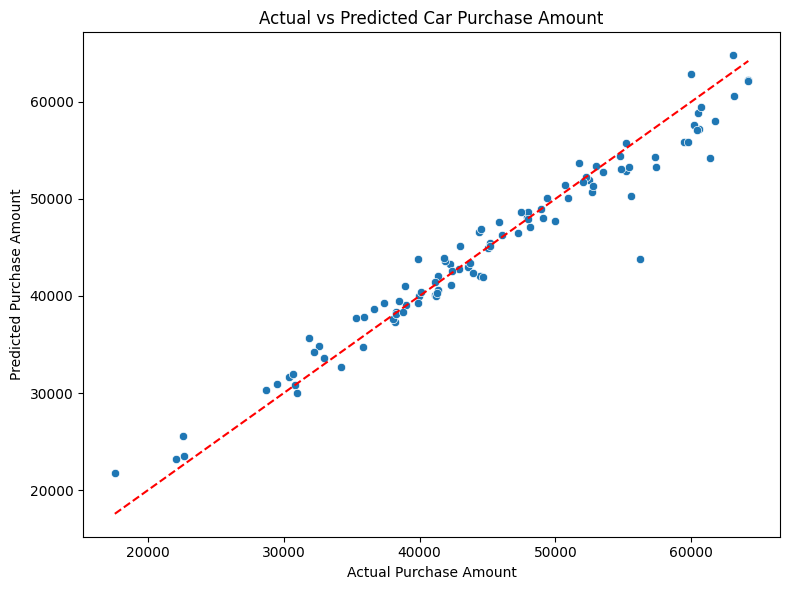

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv('/content/car_purchasing.csv', encoding='ISO-8859-1')

# Drop non-informative columns
df = df.drop(columns=['customer name', 'customer e-mail'])

# Rename for consistency
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# Features and target
X = df.drop(columns=['car_purchase_amount'])
y = df['car_purchase_amount']

# Separate column types
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipelines
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Full modeling pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model_pipeline.fit(X_train, y_train)

# Predict
y_pred = model_pipeline.predict(X_test)

# Evaluation
print("\n--- Model Evaluation ---")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE : {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²  : {r2_score(y_test, y_pred):.2f}")

# Save the model
os.makedirs('models', exist_ok=True)
joblib.dump(model_pipeline, 'models/car_sales_model.pkl')

# Plot predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.title('Actual vs Predicted Car Purchase Amount')
plt.tight_layout()
plt.show()
